In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'

##pre - processing and EDA

In [23]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [25]:
#sorting according to outcome
df = df.sort_values('Outcome')
df.head()
#seperating 0 and 1 values, so that i can handle 0 values of them seperatley
grouped = df.groupby(df.Outcome)
dfzero = grouped.get_group(0)
dfone =grouped.get_group(1)
dfone.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
16,0,118,84,47,230,45.8,0.551,31,1
17,7,107,74,0,0,29.6,0.254,31,1
19,1,115,70,30,96,34.6,0.529,32,1
22,7,196,90,0,0,39.8,0.451,41,1
23,9,119,80,35,0,29.0,0.263,29,1


In [26]:
#replacing with median for 1 values
dfone['Pregnancies']=dfone['Pregnancies'].replace(0,dfone['Pregnancies'].median())
dfone['Glucose']=dfone['Glucose'].replace(0,dfone['Glucose'].median())
dfone['BloodPressure']=dfone['BloodPressure'].replace(0,dfone['BloodPressure'].median())
dfone['SkinThickness']=dfone['SkinThickness'].replace(0,dfone['SkinThickness'].median())
dfone['Insulin']=dfone['Insulin'].replace(0,dfone['Insulin'].mean())
dfone['BMI']=dfone['BMI'].replace(0,dfone['BMI'].median())
#replacing with median for 0 values
dfzero['Pregnancies']=dfzero['Pregnancies'].replace(0,dfzero['Pregnancies'].median())
dfzero['Glucose']=dfzero['Glucose'].replace(0,dfzero['Glucose'].median())
dfzero['BloodPressure']=dfzero['BloodPressure'].replace(0,dfzero['BloodPressure'].median())
dfzero['SkinThickness']=dfzero['SkinThickness'].replace(0,dfzero['SkinThickness'].median())
dfzero['Insulin']=dfzero['Insulin'].replace(0,dfzero['Insulin'].mean())
dfzero['BMI']=dfzero['BMI'].replace(0,dfzero['BMI'].median())
df = pd.concat([dfzero,dfone])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
28,13,145,82,19,110.000,22.2,0.245,57,0
29,5,117,92,21,68.792,34.1,0.337,38,0
30,5,109,75,26,68.792,36.0,0.546,60,0
752,3,108,62,24,68.792,26.0,0.223,25,0
756,7,137,90,41,68.792,32.0,0.391,39,0


In [27]:
(df == 0).sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

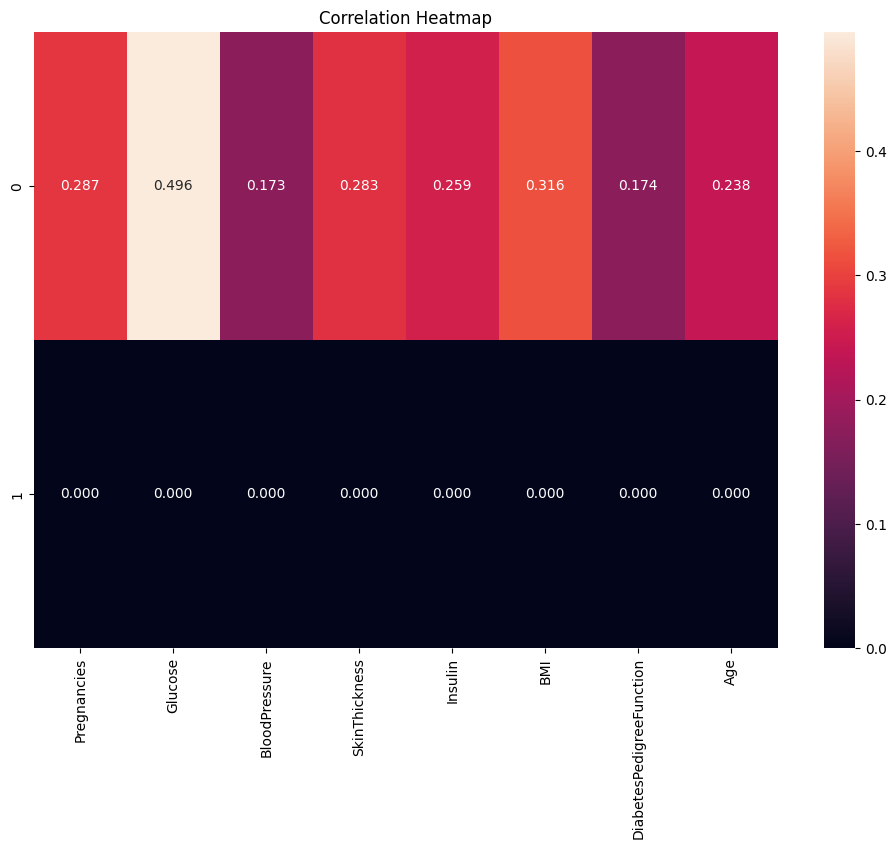

In [28]:
#point biserial heatmap
x = df.iloc[:,:-1]
y = df['Outcome']
corrvals = x.corrwith(y.astype('float'), method=stats.pointbiserialr)
plt.figure(figsize=(12, 8))
sns.heatmap(corrvals, annot=True, fmt='.3f')
plt.title('Correlation Heatmap')
plt.show()


Point-biserial correlation is used to measure the relationship between a binary variable and a continuous variable. It is a special case of Pearson correlation where one variable is dichotomous.

in the above heatmap, we see that for the outcome 1, only 2 features are related, blood pressur and skin thickness.

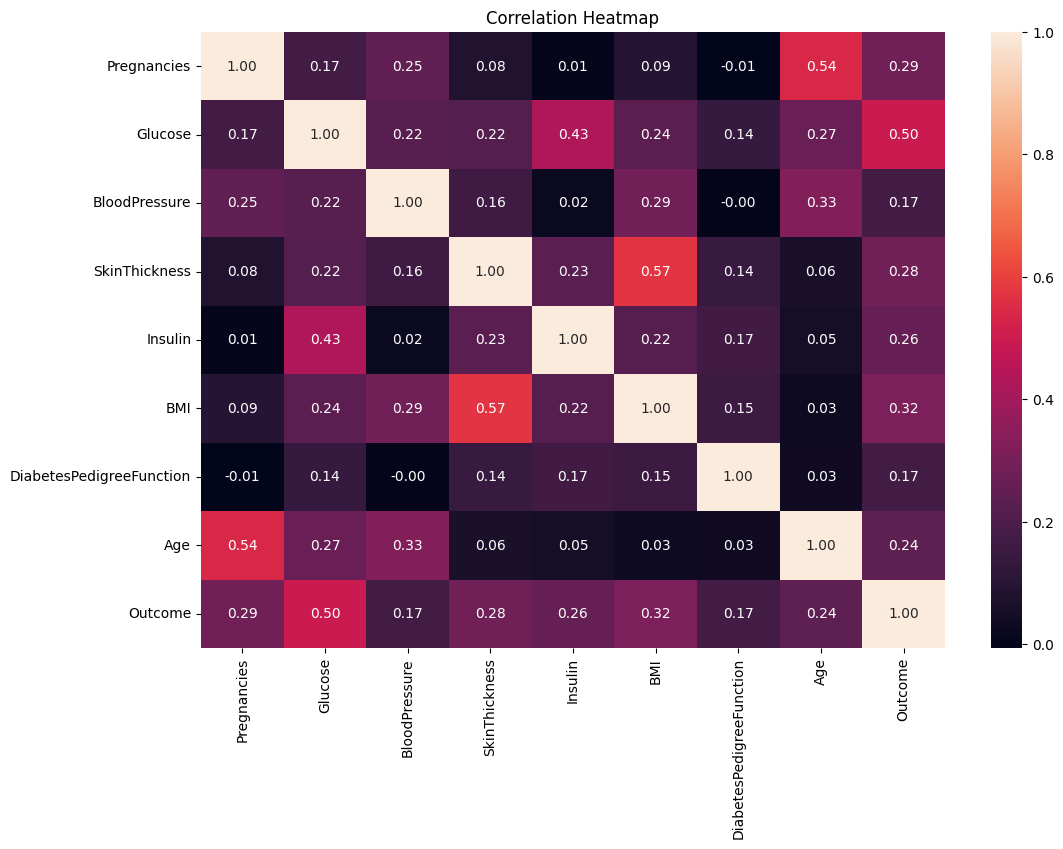

In [29]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
fig = px.scatter(df,x = "BMI", y = "SkinThickness", title = "BMI vs skin thickness", template = "plotly_dark", color = "Outcome")
fig.show()

In [31]:
fig = px.scatter(df,x = "Glucose", y = "Insulin", title = "Glucose vs Insulin", template = "plotly_dark", color = "Outcome")
fig.show()

<Axes: xlabel='Pregnancies'>

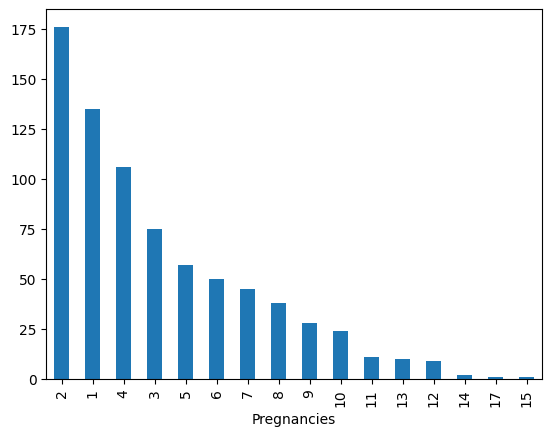

In [32]:
df['Pregnancies'].value_counts().plot.bar()

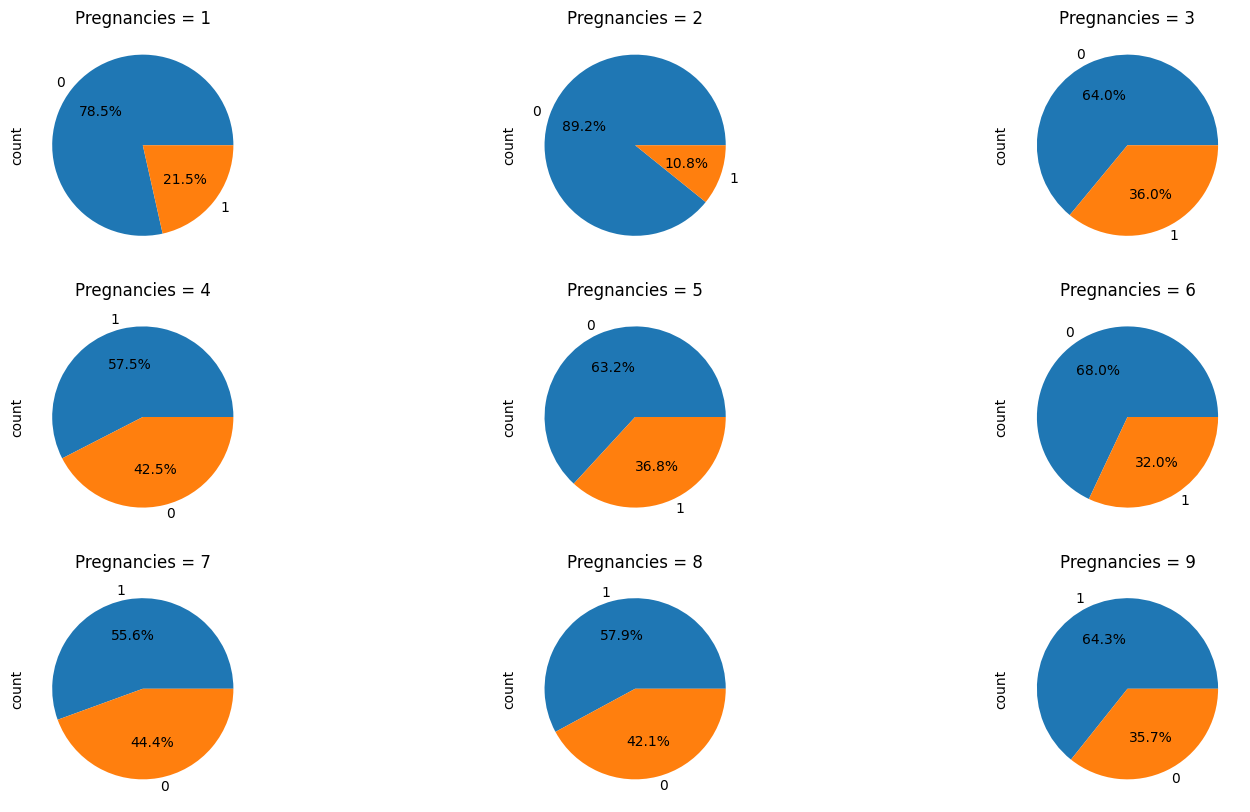

In [33]:
plt.figure(figsize=(18,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    df[df['Pregnancies']==i+1].Outcome.value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(f"Pregnancies = {i+1}")


#classifications


##SVM

In [34]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df.iloc[:,:-1]= scaler.fit_transform(df.iloc[:,:-1])
#scaled everything except target class
x = df.iloc[:,:-1]
y = df['Outcome']
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#svm
from sklearn import svm
clf = svm.SVC(kernel='linear')
#linear kernel
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
#predicted on test value after training
accu = clf.score(x_test,y_test)
print("accuracy of SVM : ", accu)
#accuracy of model


accuracy of SVM :  0.7662337662337663


C:\Users\Tanish\AppData\Local\Temp\ipykernel_21512\970270249.py:4: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 2.86301193  0.25045508  0.25045508 -0.40268414  0.90359429 -1.05582335
 -0.72925374  1.5567335   1.88330311 -0.72925374  0.25045508 -1.05582335
 -0.72925374 -0.07611453 -0.72925374 -1.05582335 -0.07611453 -0.72925374
  1.2301639  -0.72925374 -0.40268414 -1.05582335  2.86301193  2.53644232
 -1.05582335 -1.05582335 -1.05582335 -1.05582335  0.25045508  1.88330311
 -0.07611453 -1.05582335 -1.05582335  0.25045508  0.90359429 -1.05582335
 -0.72925374 -0.72925374 -0.72925374 -0.72925374  0.25045508 -0.72925374
 -0.40268414  0.57702468  1.88330311 -0.07611453  2.20987271 -0.40268414
 -0.40268414  1.88330311 -1.05582335  0.25045508 -0.72925374 -1.05582335
 -0.07611453  0.25045508 -0.07611453 -1.05582335 -1.05582335  0.90359429
  0.25045508 -0.72925374  0.90359429 -1.05582335 -0.72925374 -0.72925374
  2.8630119

##KNN

Text(0, 0.5, 'Error Rate')

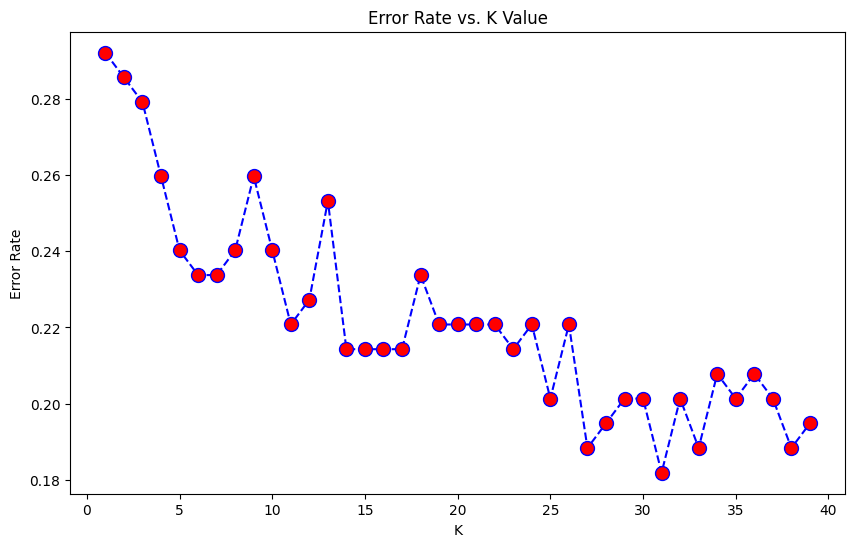

In [35]:
#k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error_rate = []
for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

choosing k = 35

WITH K=35


              precision    recall  f1-score   support

           0       0.83      0.88      0.85       104
           1       0.71      0.64      0.67        50

    accuracy                           0.80       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.79      0.80      0.80       154



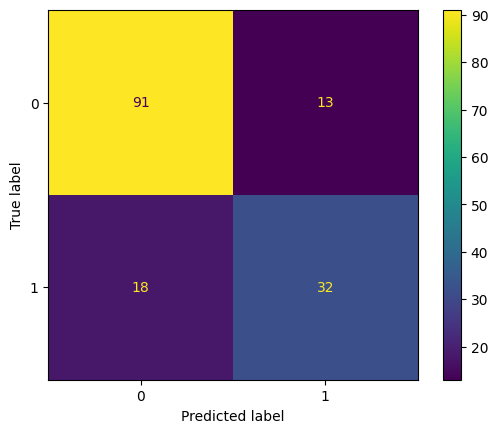

In [36]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
knn = KNeighborsClassifier(n_neighbors=35, weights = 'uniform')

knn.fit(x_train,y_train)
pred = knn.predict(x_test)
y_pred_proba = knn.predict_proba(x_test)[:, 1]
print('WITH K=35')
print('\n')
print(classification_report(y_test,pred))
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

accuracy = 83.
therefore knn is better than SVM. But still the amount of false negatives is too much, and we have to reduce that.

to ensure better handling of false positives and false negatives, we try lowering the threshold line

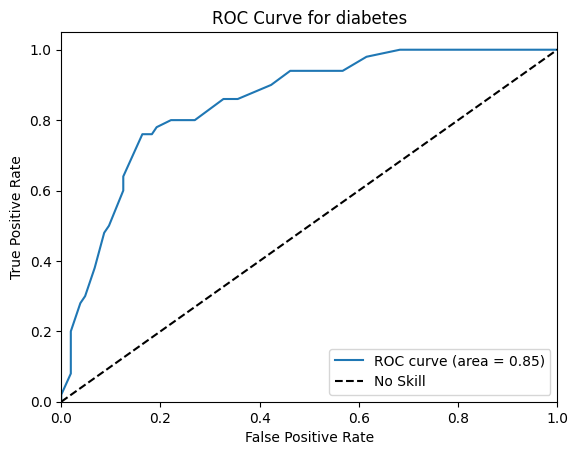

In [37]:
#
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for diabetes')
plt.legend()
plt.show()

from this graph, we will define threshold line somewhere around 0.3 - 0.4

              precision    recall  f1-score   support

           0       0.89      0.71      0.79       104
           1       0.58      0.82      0.68        50

    accuracy                           0.75       154
   macro avg       0.73      0.77      0.73       154
weighted avg       0.79      0.75      0.75       154



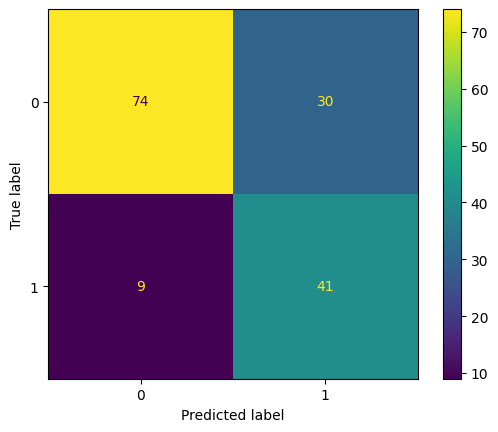

In [38]:
y_pred = (knn.predict_proba(x_test)[:,1] >= 0.32).astype(bool)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

successfully minimized false negatives in prediction.


##Random Forest

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       104
           1       0.81      0.84      0.82        50

    accuracy                           0.88       154
   macro avg       0.86      0.87      0.87       154
weighted avg       0.88      0.88      0.88       154



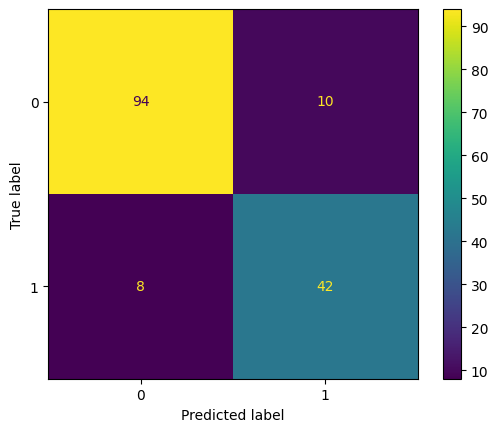

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

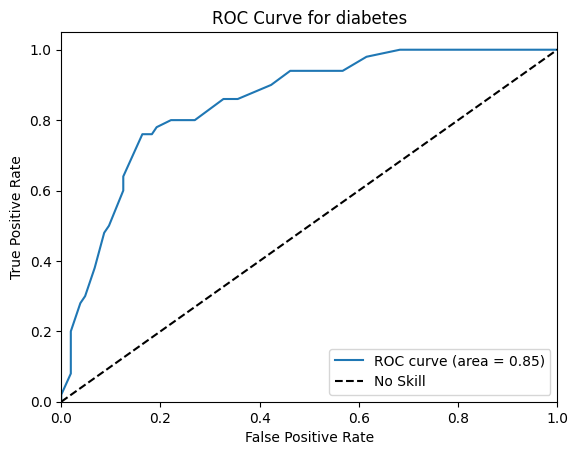

In [40]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for diabetes')
plt.legend()
plt.show()

from above curve, we select thresh hold value from somewhere around 0.3-0.4

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       104
           1       0.76      0.88      0.81        50

    accuracy                           0.87       154
   macro avg       0.85      0.87      0.86       154
weighted avg       0.88      0.87      0.87       154



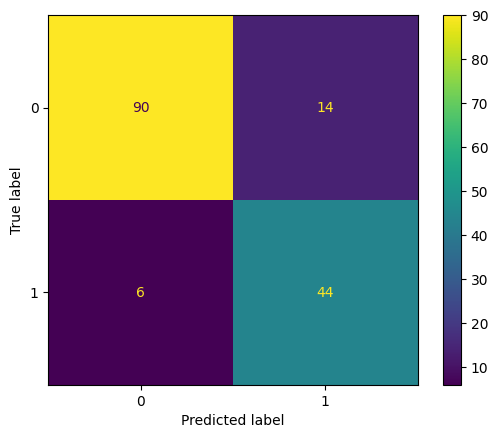

In [41]:
y_pred = (rfc.predict_proba(x_test)[:,1] >= 0.37).astype(bool)
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
#confusion matrix
disp.plot()
plt.show()

#making test report

In [42]:
y_pred = pd.Series(y_pred, index=x_test.index, name='ypred')
dfnew = pd.concat([x_test, y_test.rename('ytest'), y_pred], axis=1)
dfnew.reset_index(drop=True, inplace = True)
dfnew.head()
dfnew.to_csv('diabetes classification report.csv', header=True, index = True)